In [166]:
import pandas as pd
import numpy as np

In [167]:
from matplotlib import pyplot as plt
import seaborn as sns

In [168]:
#Read the data
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Text(0.5, 1.0, 'Edible v. poisonous population')

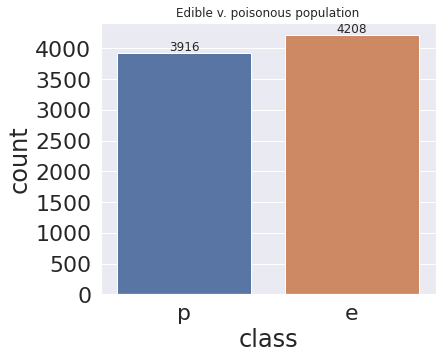

In [169]:
#What is the distribution of Edible v poisonous?
counts = sns.countplot(x=df['class'])
sns.set(rc={'figure.figsize':(6,5)})
counts.bar_label(counts.containers[0])
plt.title('Edible v. poisonous population')


In [170]:
#Number of population of poisonous v. Edible
sr = pd.Series(df['class'])
sr.value_counts(sort = True)

e    4208
p    3916
Name: class, dtype: int64

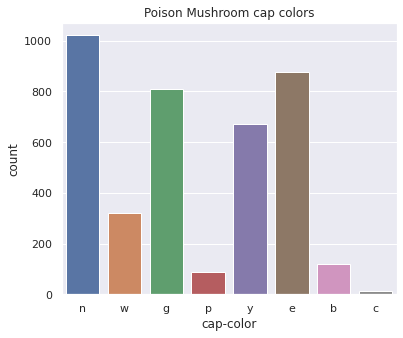

In [171]:
#get only poison ones
df_poisoned = df[df['class'] == 'p']

#which cap-color has the most poison?
poison = sns.countplot(x=df_poisoned['cap-color']).set(title='Poison Mushroom cap colors')

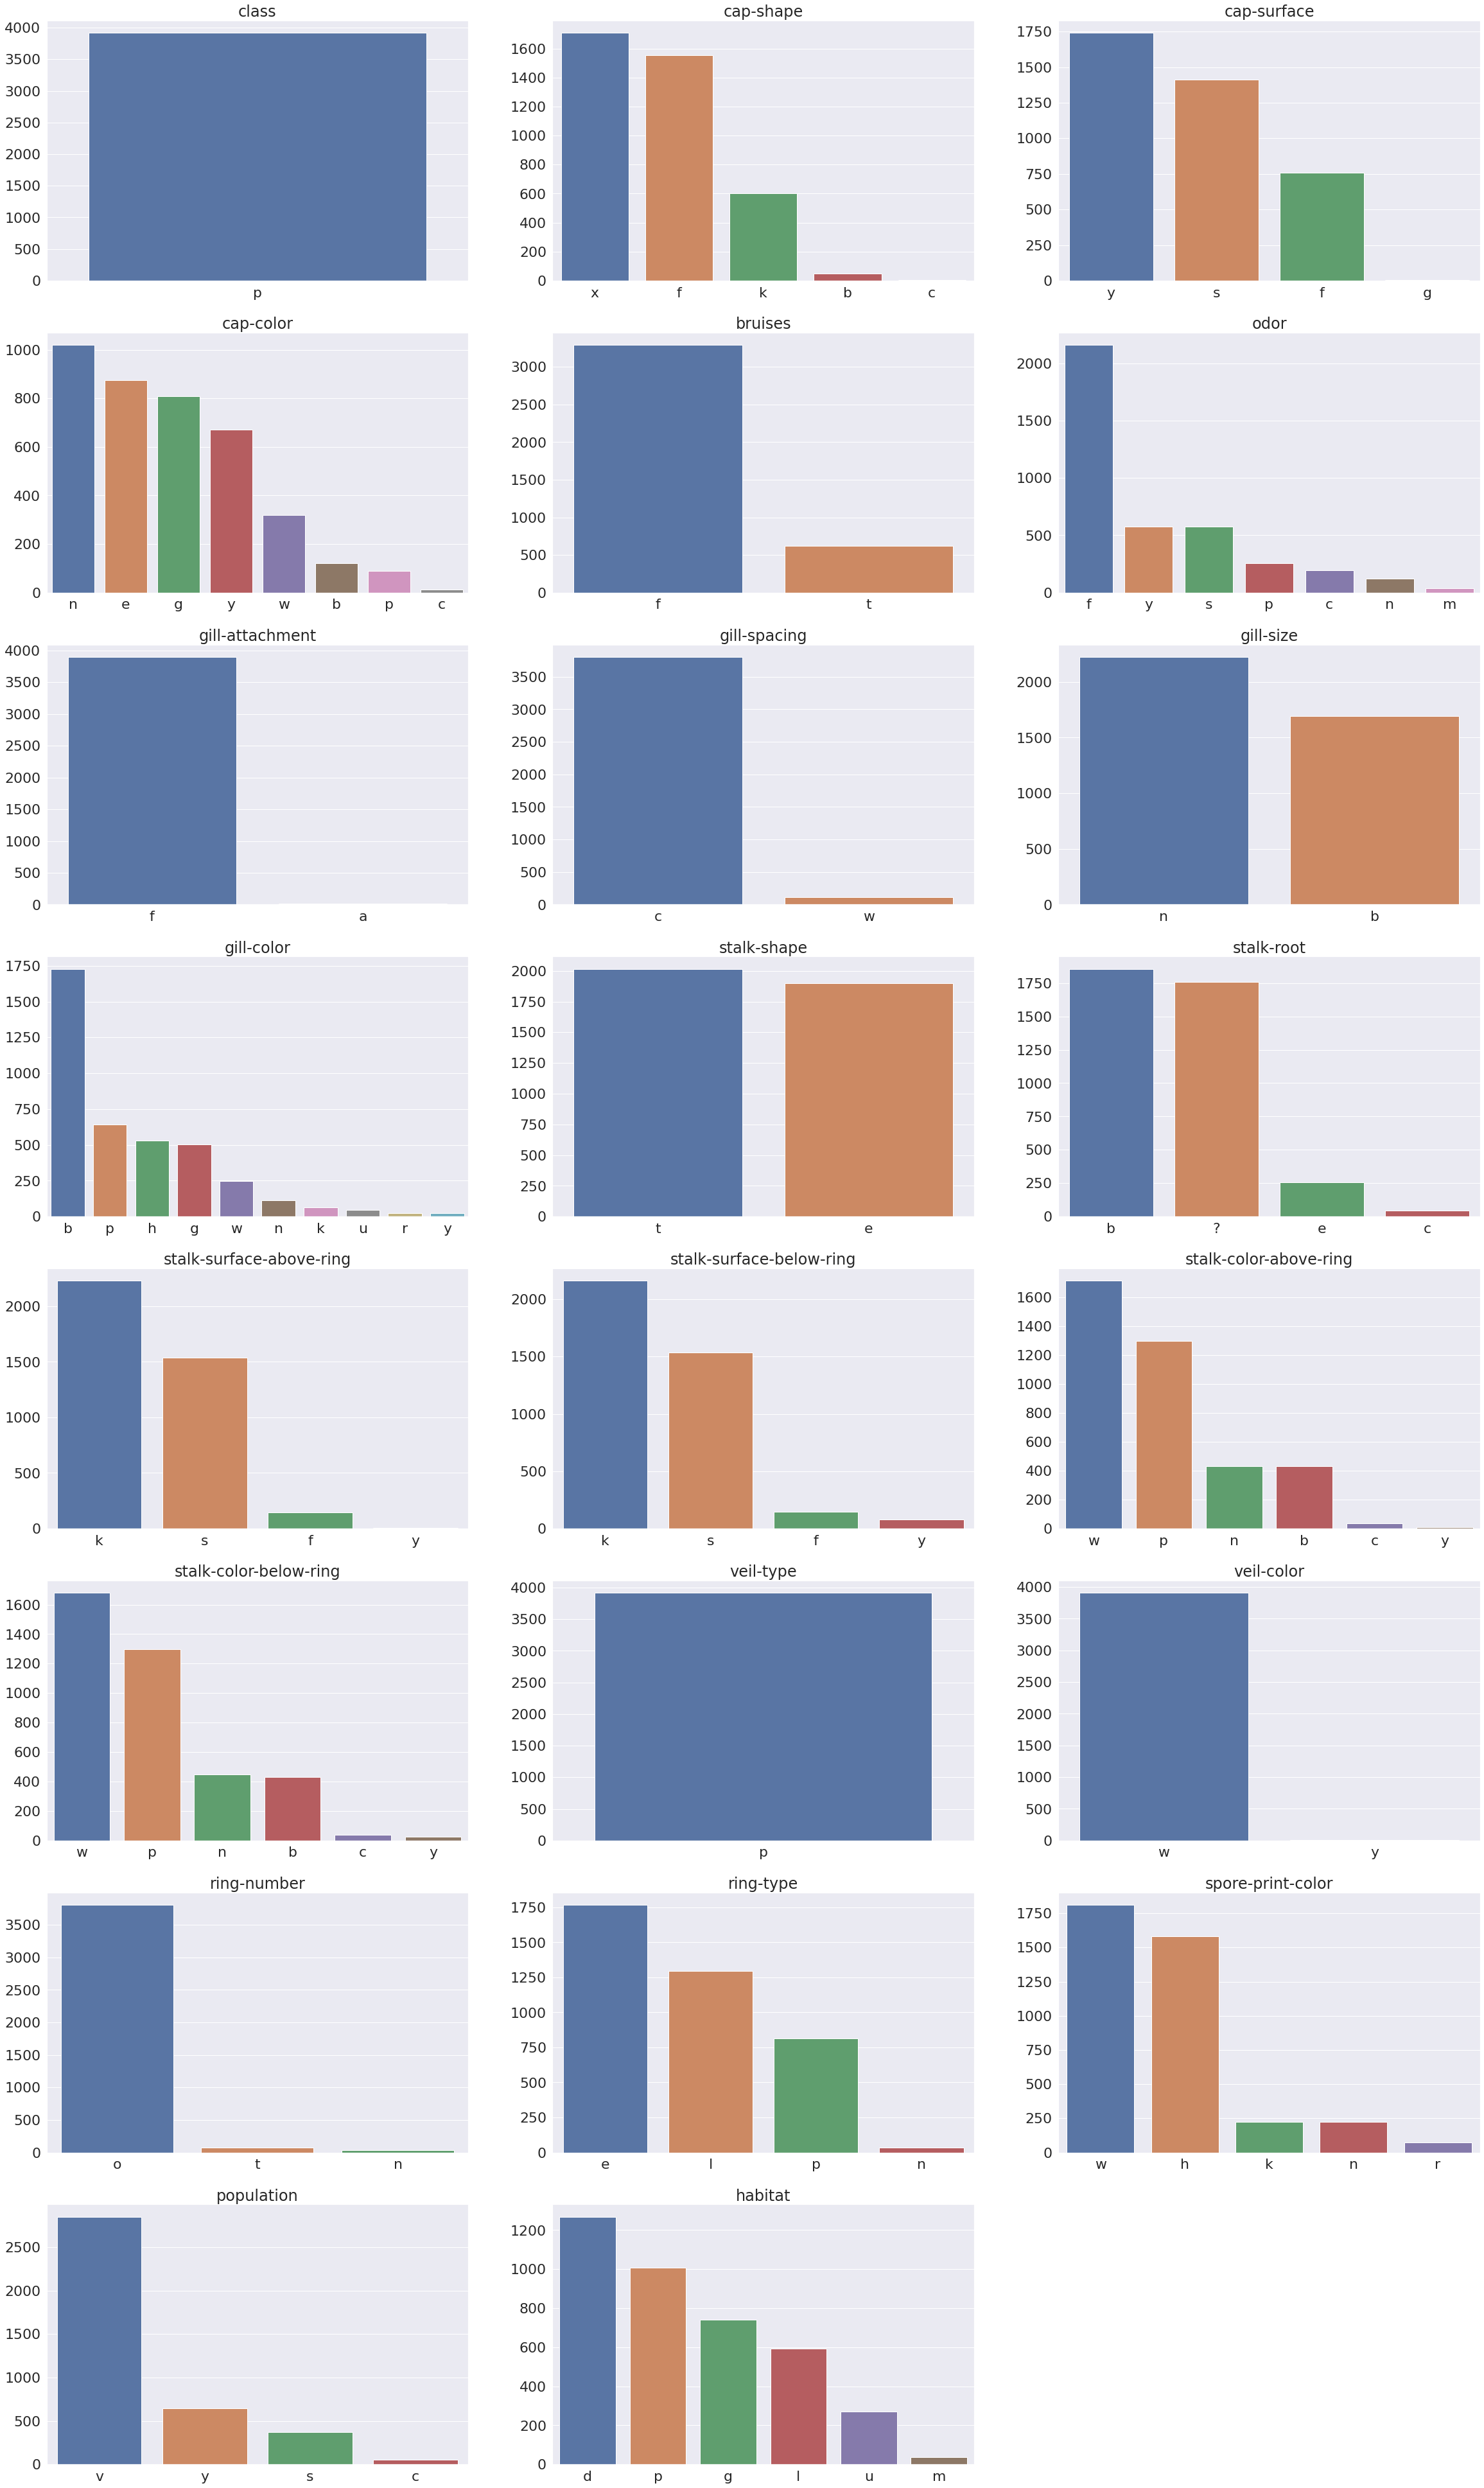

In [172]:
#Graph setting
f = plt.figure(figsize=(40,70))
sns.set(font_scale = 2)

#Showing all poison mushroom population in each category
for count, column in enumerate(df_poisoned.columns):
    decreasing = df_poisoned[column].value_counts().index
    f.add_subplot(8,3, count+1)
    sns.countplot(x=column, data=df_poisoned, order=decreasing).set(title=column, xlabel = "", ylabel="")
    
#plt.show()


In [173]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['class']= label_encoder.fit_transform(df['class'])
  
df['class'].unique()

array([1, 0])

In [174]:
#making all non numerical data to numerical data.
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

df = handle_non_numerical_data(df)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,0,2,0,0,1,0,1,9,...,2,2,2,0,1,0,0,6,3,5
1,0,2,0,9,0,7,1,0,0,9,...,2,2,2,0,1,0,0,2,1,4
2,0,4,0,0,0,6,1,0,0,3,...,2,2,2,0,1,0,0,2,1,2
3,1,2,1,0,0,0,1,0,1,3,...,2,2,2,0,1,0,0,6,3,5
4,0,2,0,3,1,2,1,1,0,9,...,2,2,2,0,1,0,2,2,4,4


In [175]:
#Training for Machine Learning Prep
from sklearn.model_selection import train_test_split

mushroom_status = df.drop("class",axis=1)
target = df["class"]

X_train,X_test,Y_train,Y_test = train_test_split(mushroom_status,target,test_size=0.20,random_state=0)

In [176]:
#Logistic Regression Machine Learning Algorithm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 97.05 %


/home/james/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [177]:
Y_test

380     1
3641    0
273     0
1029    0
684     0
       ..
3535    0
1643    0
6494    1
6       0
3175    0
Name: class, Length: 1625, dtype: int64

In [178]:
Y_pred_lr

array([1, 0, 0, ..., 1, 0, 0])

In [179]:
#Confusion Matrix using Logistic Regression
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred_lr))

#True Negative: 825
#True Positive: 752

#False Negative: 21
#False Positive: 27

[[825  27]
 [ 21 752]]
